## Практическая работа: 2 

# Тема: Дерево решений

---

### Цель работы

Научиться применять модель дерева решений (Decision Tree) для решения задач классификации и регрессии, познакомиться с основными гиперпараметрами, критериями разбиения и методами контроля переобучения.

## Теоретическая справка

**Дерево решений** (Decision Tree) — один из наиболее интерпретируемых алгоритмов машинного обучения, основанный на принципе *«разделяй и властвуй»*. 

Алгоритм строит иерархическую структуру правил вида «если признак $x_i < t$, то...», и может использоваться как для задач классификации, так и для регрессии.

#### Принцип работы
1. Выбрать признак  $x_i$ и порог  $t$, по которому разбить данные на две части
2. Рекурсивно повторить для каждой части, пока не выполнится критерий остановки

Разбиение узла прекращается, если выполняется хотя бы один из критериев:

| Критерий | Когда срабатывает |
|----------|-------------------|
| Чистый узел | Все объекты одного класса (Gini = 0, Entropy = 0) |
| `max_depth` | Достигнута максимальная глубина |
| `min_samples_split` | В узле меньше объектов, чем нужно для разбиения |
| `min_samples_leaf` | Разбиение создаст лист с недостаточным числом объектов |
| `max_leaf_nodes` | Достигнуто максимальное число листьев |
| `min_impurity_decrease` | Разбиение не даёт достаточного улучшения |
   
**Для классификации:**

3. В листовом узле присвоить класс, который чаще всего встречается среди объектов, попавших в этот узел (голосование большинством)

**Для регрессии:**

3. В листовом узле вычислить предсказание как среднее значение целевой переменной:
$$\hat{y} = \frac{1}{|L|} \sum_{i \in L} y_i ,$$

где $\hat{y}$ — предсказание модели, $L$ — множество объектов, попавших в листовой узел, $|L|$ — число объектов в листе, $y_i$ — значение целевой переменной $i$-го объекта.

### Критерии разбиения (для классификации)

Выбор признака и порога основан на минимизации критерия неопределённости:

| Критерий | Формула | Описание |
|----------|---------|----------|
| **Энтропия (Entropy)** | $H = -\sum_{k=1}^{K} p_k \log_2 p_k$ | Мера неопределённости, Information Gain |
| **Индекс Джини (Gini)** | $G = 1 - \sum_{k=1}^{K} p_k^2$ | Вероятность ошибочной классификации |
| **Ошибка классификации** | $E = 1 - \max_k p_k$ | Доля ошибок (редко используется) |

где $p_k$ — доля объектов класса $k$ в узле, $K$ — число классов.

**Сравнение критериев:**
- Gini — быстрее вычисляется (нет логарифма), используется по умолчанию
- Entropy — чуть более сбалансированные деревья, но медленнее
- На практике разница минимальна

### Критерии разбиения (для регрессии)

| Критерий | Формула | Описание |
|----------|---------|----------|
| **MSE (squared_error)** | $\frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y})^2$ | Минимизация дисперсии, по умолчанию |
| **MAE (absolute_error)** | $\frac{1}{n}\sum_{i=1}^{n}|y_i - \text{median}(y)|$ | Устойчив к выбросам |
| **Poisson** | Пуассоновская девианса | Для счётных данных |

где $n$ — число объектов в узле, $y_i$ — значение целевой переменной $i$-го объекта, $\bar{y}$ — среднее значение в узле.

### Масштабирование данных

✅ **Важное преимущество:** Деревья решений **НЕ требуют масштабирования данных!**

Алгоритм работает с пороговыми значениями признаков, поэтому масштаб не влияет на результат разбиения. Это существенное отличие от метрических методов (KNN, SVM).

### Регуляризация в деревьях решений

Деревья решений склонны к **переобучению** — без ограничений дерево запомнит обучающую выборку. В отличие от линейных моделей, где регуляризация штрафует большие веса (L1/L2), в деревьях решений **регуляризация — это ограничение сложности структуры дерева**.

**Параметры регуляризации:**

| Параметр | Описание | Эффект |
|----------|----------|--------|
| `max_depth` | Максимальная глубина дерева | Ограничивает сложность сверху |
| `min_samples_split` | Минимум объектов для разбиения узла | Предотвращает мелкие разбиения |
| `min_samples_leaf` | Минимум объектов в листе | Обеспечивает статистическую значимость |
| `max_leaf_nodes` | Максимальное число листьев | Прямое ограничение размера |
| `min_impurity_decrease` | Минимальное улучшение при разбиении | Отсекает слабые разбиения |
| `ccp_alpha` | Параметр стоимостной обрезки | Post-pruning |

**Сила регуляризации:**

| Параметр | Слабая регуляризация (переобучение) | Сильная регуляризация (недообучение) |
|----------|-------------------------------------|--------------------------------------|
| `max_depth` | `None`, `10`, `15` | `3`, `5`, `7` |
| `min_samples_split` | `2`, `5` | `10`, `20`, `50` |
| `min_samples_leaf` | `1`, `2` | `5`, `10`, `20` |
| `max_leaf_nodes` | `50`, `100`, `None` | `5`, `10`, `20` |
| `min_impurity_decrease` | `0.0` | `0.01`, `0.05`, `0.1` |
| `ccp_alpha` | `0.0`, `0.001` | `0.01`, `0.05`, `0.1` |

**Практический подход к борьбе с переобучением:**

1. Запустить GridSearchCV с широкой сеткой параметров
2. Проверить лучшую модель на переобучение (сравнить Train score и CV score)
3. Если переобучение обнаружено — **ужесточить ограничения** в сетке и запустить GridSearchCV снова

**Пример корректировки сетки:**
```python
# Первый запуск — широкая сетка
param_grid = {'max_depth': [5, 10, 15, None], 'min_samples_leaf': [1, 2, 5]}
# Лучшая модель: max_depth=None, min_samples_leaf=1 → переобучение!

# Второй запуск — усиленная регуляризация
param_grid = {'max_depth': [3, 5, 7], 'min_samples_leaf': [5, 10, 20]}
# Дерево проще, переобучения нет
```

### Критерий переобучения

После подбора гиперпараметров необходимо проверить модель на переобучение, сравнив Train score и CV score:

| Задача | Критерий переобучения |
|--------|----------------------|
| **Классификация** | Train F1 − CV F1 > 5% (по F1-score) |
| **Регрессия** | CV MSE > Train MSE × 1.5 (по MSE-score)|

### Важность признаков (Feature Importance)

Дерево решений позволяет оценить важность каждого признака:

$$\text{importance}(f) = \sum_{\text{узлы с } f} \frac{n_{\text{узел}}}{n_{\text{всего}}} \cdot \Delta \text{impurity}$$

где $f$ — признак, $n_{\text{узел}}$ — число объектов в узле, $n_{\text{всего}}$ — общее число объектов в выборке, $\Delta \text{impurity}$ — уменьшение неопределённости при разбиении по этому признаку.

Сумма важностей всех признаков равна 1. Доступно через атрибут `feature_importances_`.

### Преимущества и недостатки

| ✅ Преимущества | ❌ Недостатки |
|-----------------|---------------|
| Высокая интерпретируемость | Склонность к переобучению |
| Не требует масштабирования | Нестабильность (чувствительность к данным) |
| Работает с категориальными признаками | Не умеет экстраполировать (регрессия) |
| Быстрое обучение и предсказание | Ступенчатые границы решений |
| Визуализация структуры модели | Жадный алгоритм (не глобальный оптимум) |

### Реализация в Scikit-learn

Основные классы:
- [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) — для классификации
- [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) — для регрессии

**Ключевые параметры:**

| Параметр | Значения | Описание |
|----------|----------|----------|
| `criterion` | `'gini'`, `'entropy'` (класс.) / `'squared_error'`, `'absolute_error'` (регр.) | Критерий разбиения |
| `max_depth` | int или None | Максимальная глубина |
| `min_samples_split` | int или float | Минимум для разбиения |
| `min_samples_leaf` | int или float | Минимум в листе |
| `max_features` | int, float, `'sqrt'`, `'log2'`, None | Признаков для разбиения |
| `ccp_alpha` | float | Параметр обрезки |
| `random_state` | int | Для воспроизводимости |

**Основные методы:**
- `fit(X, y)` — обучение модели
- `predict(X)` — предсказание для новых объектов
- `predict_proba(X)` — вероятности классов (только классификация)
- `score(X, y)` — оценка качества (accuracy для классификации, R² для регрессии)
- `feature_importances_` — важность признаков
- `get_depth()` — глубина обученного дерева
- `get_n_leaves()` — число листьев обученного дерева

**Визуализация дерева:**
- [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) — графическое представление
- [`export_text()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) — текстовое представление

### Дополнительные ресурсы

- [Официальная документация sklearn.tree](https://scikit-learn.org/stable/modules/tree.html)
- [User Guide: Decision Trees](https://scikit-learn.org/stable/modules/tree.html#tree)

---
### Импорт библиотек

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text

Настраиваем параметры отображения и фиксируем random seed:

In [2]:
plt.rcParams['figure.figsize'] = (6, 4)
np.random.seed(42)

## Классификация
# Задания для выполнения:
Использовать датасет Breast Cancer Wisconsin для классификации опухолей на злокачественные и доброкачественные. Взять два признака для возможности визуализации границ решений.

### План работы:

1. Загрузить и исследовать данные
2. Разделить данные на train/test
3. Обучить модель дерева с параметрами по умолчанию
4. Подобрать гиперпараметры (GridSearchCV)
5. Провести анализ переобучения
6. Оценить качество на тестовых данных
7. Визуализировать структуру лучшего дерева
8. Вывести важность признаков лучшей модели
9. Визуализировать границы решений

---

### Задание 1. Загрузить и исследовать данные

Загрузить встроенный датасет Breast Cancer Wisconsin. Взять в качестве признаков $X$ два столбца **mean concavity** (средняя вогнутость контура ядра, индекс 6) и **worst symmetry** (наихудшая симметрия ядра, индекс 28). Вывести признаки вместе с целевой переменной в виде датафрейма. Определить количество объектов в каждом классе и построить диаграмму рассеяния с цветовой кодировкой классов.

**Указание:** Использовать функцию [`load_breast_cancer()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

In [4]:
data = load_breast_cancer()
data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
X = data.data[:, [6, 28]]
y = data.target

In [7]:
df = pd.DataFrame(X, columns=["mean_concavity", "worst_symmetry"])
df["target"] = y
df.head()

,mean_concavity,worst_symmetry,target
0,0.3001,0.4601,0
1,0.0869,0.2750,0
2,0.1974,0.3613,0
3,0.2414,0.6638,0
4,0.1980,0.2364,0


In [9]:
class_counts = df["target"].value_counts()
class_counts

target
1    357
0    212
Name: count, dtype: int64

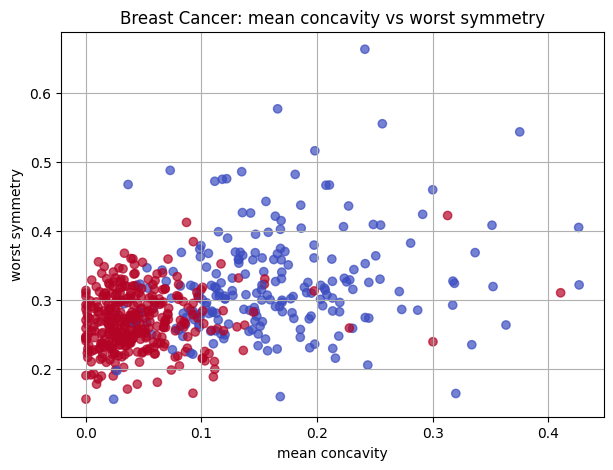

In [14]:
plt.figure(figsize=(7, 5))
plt.scatter(
    df["mean_concavity"],
    df["worst_symmetry"],
    c=df["target"],
    cmap="coolwarm",
    alpha=0.7
)

plt.xlabel("mean concavity")
plt.ylabel("worst symmetry")
plt.title("Breast Cancer: mean concavity vs worst symmetry")
# plt.colorbar(label="Class (0 = malignant, 1 = benign)")
plt.grid(True)
plt.show()

---
### Задание 2. Разделить данные на train/test

Разделить данные на обучающую и тестовую выборки в соотношении 80/20. Вывести размеры полученных выборок. Построить на одном графике диаграмму рассеяния обучающих и тестовых данных с цветовой кодировкой классов, сделав маркеры train — мелкие без обводки, test — крупные с обводкой.

**Указание:** Использовать [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) с `random_state=42` и `stratify=y`.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [12]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (455, 2)
X_test : (114, 2)
y_train: (455,)
y_test : (114,)


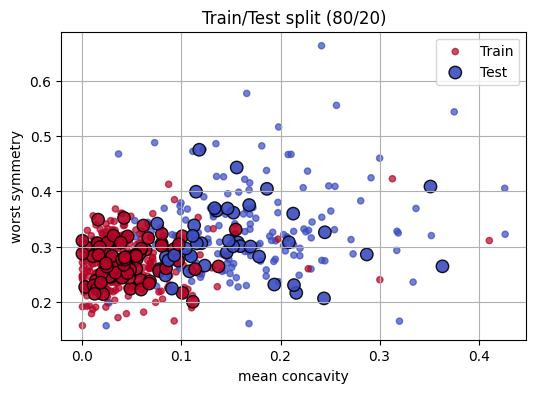

In [ ]:
# TRAIN 
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap="coolwarm",
    s=20,
    alpha=0.7,
    label="Train"
)

# TEST 
plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_test,
    cmap="coolwarm",
    s=80,
    edgecolors="black",
    linewidths=1,
    alpha=0.9,
    label="Test"
)

plt.xlabel("mean concavity")
plt.ylabel("worst symmetry")
plt.title("Train/Test split (80/20)")
plt.legend()
plt.grid(True)
plt.show()

---
### Задание 3. Обучить модель дерева с параметрами по умолчанию

Создать модель `DecisionTreeClassifier(random_state=42)` с параметрами по умолчанию и вывести значения параметров. Обучить модель на обучающих данных. Вывести глубину получившегося дерева и количество его листьев. Оценить качество построенной модели на тестовых данных. Для этого вычислить метрики accuracy и F1-score (с весовым усреднением) на тестовых данных.

**Примечание:** Для вывода глубины и количества листьев используйте `get_depth()` и `get_n_leaves()` соответственно.

In [17]:
model = DecisionTreeClassifier(random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [24]:
model.fit(X_train, y_train)
depth = model.get_depth()
n_leaves = model.get_n_leaves()
depth, n_leaves

(12, np.int64(67))

In [ ]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
acc, f1

(0.8421052631578947, 0.8428293137035184)

---
### Задание 4. Подобрать гиперпараметры (GridSearchCV)

Использовать `GridSearchCV` для автоматического подбора оптимальных (по метрике F1-весовой) гиперпараметров модели дерева решений. Вывести лучшие значения гиперпараметров.

**Указание:** Использовать сетку гиперпараметров (слабая регуляризация):
- `'max_depth': [5, 10, 15, None]`
- `'min_samples_split': [2, 5]`
- `'min_samples_leaf': [1, 2]`
- `'max_leaf_nodes': [10, 20, None]`
- `'criterion': ['gini', 'entropy']`

Использовать `return_train_score=True` для последующего анализа переобучения.

In [30]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_leaf_nodes": [10, 20, None],
    "criterion": ["gini", "entropy"]
}
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=5,
    return_train_score=True,
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'max_leaf_nodes': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             return_train_score=True, scoring='f1_weighted')

In [32]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

---
### Задание 5. Провести анализ переобучения

Проверить лучшую модель из GridSearchCV на переобучение. 

Если переобучение обнаружено — ужесточить регуляризацию в сетке параметров и запустить GridSearchCV повторно.

**Указание:** Использовать критерий: Train F1 − CV F1 > 5%.

Регуляризованная сетка гиперпараметров:
- `'max_depth': [3, 4, 5, 6]`
- `'min_samples_split': [10, 20, 30]`
- `'min_samples_leaf': [5, 10, 15]`
- `'max_leaf_nodes': [5, 10, 15]`
- `'criterion': ['gini', 'entropy']`

In [35]:
best_index = grid.best_index_
best_index

np.int64(57)

In [36]:
train_f1 = grid.cv_results_['mean_train_score'][best_index]
cv_f1 = grid.cv_results_['mean_test_score'][best_index]
train_f1, cv_f1

(np.float64(0.9323906851061127), np.float64(0.8743270696119907))

In [37]:
train_f1 - cv_f1 > 0.05

np.True_

---
### Задание 6. Оценить качество на тестовых данных

Применить лучшую модель к тестовым данным, для этого вычислить метрики accuracy и F1-score (с весовым усреднением) на тестовых данных. Сравнить с моделью по умолчанию по метрике F1-score (с весовым усреднением).

---
### Задание 7. Визуализировать структуру лучшего дерева

Построить визуализацию лучшего дерева решений с помощью `plot_tree()`. Вывести текстовое представление правил через `export_text()`.

**Указание:** Использовать параметры `filled=True`, `feature_names` и `class_names` для информативной визуализации.

---
### Задание 8. Вывести важность признаков лучшей модели

Вывести важность каждого признака для лучшей модели. Проверить, что сумма важностей всех признаков равна 1. Визуализировать важности на столбчатой диаграмме. 

**Указание:** Использовать атрибут `feature_importances_`.

---
### Задание 9. Визуализировать границы решений

Построить визуализацию границ решений для лучшей модели дерева решений в пространстве обучающих данных на одном графике с диаграммами рассеяния обучающих и тестовых данных с цветовой кодировкой классов.

**Указание:**  Использовать `np.meshgrid()` для создания сетки и `plt.pcolormesh()` для раскраски областей.

## Регрессия

# Задания для выполнения:

Сгенерировать синтетические данные для регрессии (функция $y = \sin(x) + \varepsilon$) и обучить дерево регрессии.

### План работы:

1. Сгенерировать и визуализировать данные
2. Разделить данные на train/test
3. Обучить модель дерева с параметрами по умолчанию
4. Подобрать гиперпараметры (GridSearchCV)
5. Провести анализ переобучения
6. Оценить качество на тестовых данных
7. Визуализировать структуру лучшего дерева
8. Визуализировать предсказания лучшей модели

---

### Задание 1. Сгенерировать и визуализировать данные

Сгенерировать данные с одним признаком $x$ из 200 точек, равномерно распределёных на промежутке $[0, 2\pi]$, и целевой переменной $y = \sin(x) + \varepsilon$, где $\varepsilon \sim N(0, 0.3)$. Вывести данные в виде DataFrame. Построить диаграмму рассеивания данных вместе с истинной функцией $y = \sin(x)$.

**Указание:** Использовать `np.random.uniform()` для генерации $x$ и `np.random.normal()` для шума.

---
### Задание 2. Разделить данные на train/test

Разделить данные на обучающую и тестовую выборки в соотношении 80/20. Вывести размеры полученных выборок. Построить на одном графике диаграмму рассеивания обучающих и тестовых данных вместе с истинной функцией, сделав маркеры train — мелкие без обводки, test — крупные с обводкой.

**Указание:** Использовать [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) с `random_state=42`.

---
### Задание 3. Обучить модель дерева с параметрами по умолчанию

Создать модель `DecisionTreeRegressor(random_state=42)` с параметрами по умолчанию и вывести значения параметров. Обучить модель на обучающих данных. Вывести глубину получившегося дерева и количество его листьев. Оценить качество построенной модели на тестовых данных. Для этого вычислить метрики R² и RMSE на тестовых данных.

**Примечание:** Деревья решений не требуют масштабирования данных!

---
### Задание 4. Подобрать гиперпараметры (GridSearchCV)

Использовать `GridSearchCV` для автоматического подбора оптимальных гиперпараметров модели дерева регрессии.

Требования к сетке гиперпараметров (сильная регуляризация для малого датасета):
- `max_depth`: `[3, 5, 7, 10]`
- `min_samples_split`: `[5, 10]`
- `min_samples_leaf`: `[2, 5]`
- `max_leaf_nodes`: `[5, 10, 15]`

**Указание:** Использовать `scoring='neg_mean_squared_error'` и `return_train_score=True` для последующего анализа переобучения.

---
### Задание 5. Провести анализ переобучения

Проверить лучшую модель на переобучение.

Если переобучение обнаружено — ужесточить регуляризацию в сетке гиперпараметров и запустить GridSearchCV повторно.

---
### Задание 6. Оценить качество на тестовых данных

Вычислить метрики R² и RMSE для лучшей модели на тестовых данных. Сравнить качество лучшей модели с моделью по умолчанию.

---
### Задание 7. Визуализировать структуру лучшего дерева

Построить графическое и текстовое представление лучшего дерева регрессии.

**Указание:** Использовать [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) для графического представления и [`export_text()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) для текстового представления.

---
### Задание 8. Визуализировать предсказания лучшей модели

Построить график предсказаний лучшей модели на всём диапазоне данных. На графике отобразить: точки обучающей выборки, точки тестовой выборки, истинную функцию $y = \sin(x)$ и предсказания модели.

**Указание:** Создать сетку точек в диапазоне данных и применить `predict()` для получения предсказаний.